# TITANIC SURVIVAL PREDICTION PROJEC

1.DATA ANALYSIS AND MODEL DEVELOPMENT

1.1 Loading the titanic dataset using pandas.

In [8]:
import pandas as pd
df=pd.read_csv(r"C:\Users\TUF\Downloads\Titanic-Dataset.csv")
#file location is "C:\Users\TUF\Downloads\Titanic-Dataset.csv"
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.shape

(891, 12)

1.2 Undergoing Exploratory Data Analysis 

In [10]:
#Checking for missing values in the imported dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

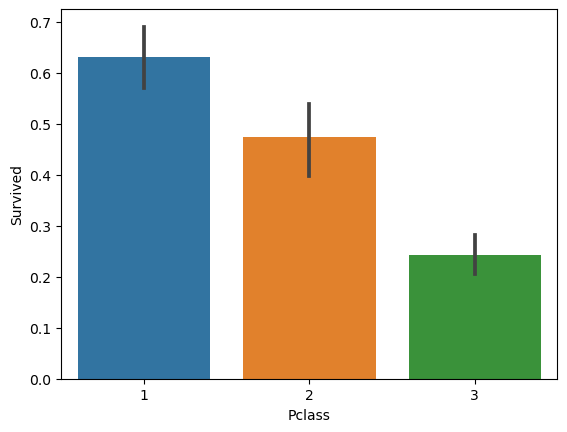

In [11]:
#Data visualization survival chances by Passenger Class (Pclass)
import matplotlib.pyplot as plt
import seaborn as sb
sb.barplot(x="Pclass",y="Survived",data=df)
plt.show()

1.3 Undergoing Data Preprocesssing and Feature Engineering

In [12]:
#Handling missing values by replacing them with median value
df['Age'].fillna(df['Age'].median(),inplace=True)

#Extracting titles from 'Name' Column
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [13]:
#Categorising non-numerical parameters values to numerical values using Label Encoding
from sklearn.preprocessing import LabelEncoder

# Encode 'Sex' column
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# Encode 'Embarked' column (handling missing values first)
df['Embarked'].fillna('S', inplace=True)
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Encode 'Title' column
df['Title'] = LabelEncoder().fit_transform(df['Title'])

In [7]:
#Ensuring There Are No Missing Values
print(df.isnull().sum())  # Check for missing values
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)
#Filling missing values with median


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64


In [14]:
#Droping irrelevant paramaters or columns
df=df.drop(columns=['Name','Ticket','Cabin','PassengerId'])
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
886,0,2,1,27.0,0,0,13.00,2,15
887,1,1,0,19.0,0,0,30.00,2,9
888,0,3,0,28.0,1,2,23.45,2,9
889,1,1,1,26.0,0,0,30.00,0,12
890,0,3,1,32.0,0,0,7.75,1,12


1.4 Splitting the Dataset

In [15]:
#Dividing dataset into training and testing sets
from sklearn.model_selection import train_test_split
X=df.drop(['Survived'],axis=1)
Y=df['Survived']
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.2,random_state=42)

1.5 Training the ML Model

In [16]:
#using Random Forest for ML Model
from sklearn.ensemble import RandomForestClassifier as rf
model= rf(n_estimators=100)
model.fit(X_train,Y_train)

RandomForestClassifier()

1.6 Evaluating the model

In [17]:
from sklearn.metrics import accuracy_score, classification_report  
Y_pred = model.predict(X_test)  
print("Accuracy:", accuracy_score(Y_test, Y_pred))  
print(classification_report(Y_test, Y_pred))


Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       105
           1       0.79      0.82      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.84      0.84      0.84       179



1.7 Saving the model 

In [18]:
import pickle  

with open(r"C:\Users\TUF\Desktop\G\titanic_model.pkl", "wb") as file:  
    pickle.dump(model, file)
    
#file saved at "C:\Users\TUF\Desktop\G"